In [1]:
import torch
import torch.nn as nn
import os
import torch.utils.data as data
from importlib import import_module
import matplotlib.pyplot as plt

vggish_input=import_module(".torchvggish.vggish_input","torchvggish-master")


#GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))
#損失関数
criterion = nn.CrossEntropyLoss()


vggish/embedding:0
Using cuda device


In [2]:
model = torch.hub.load('torchvggish-master', 'vggish', source='local', preprocess=False).to(device)
model.eval()

vggish/embedding:0


VGGish(
  (features): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False

In [3]:
class MyClassfilter(nn.Module):
    def __init__(self):
        super(MyClassfilter, self).__init__()
        self.classfilter=nn.Sequential(
            nn.Linear(128,64),
            nn.Sigmoid(),
            nn.Linear(64,5),
            nn.Softmax()
        )
    def forward(self, x):
        return self.classfilter(x)
mymodel = MyClassfilter().to(device)
mymodel.eval()

MyClassfilter(
  (classfilter): Sequential(
    (0): Linear(in_features=128, out_features=64, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=64, out_features=5, bias=True)
    (3): Softmax(dim=None)
  )
)

In [4]:
# 学習済みの重みを使用
use_pretrained = True

# モデルをロード
print(model)
print(mymodel)

VGGish(
  (features): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False

In [5]:
#試しに実行
#model.eval()# 評価しない
#import urllib
#url, filename = ("http://soundbible.com/grab.php?id=1698&type=wav", "bus_chatter.wav")
#try: urllib.URLopener().retrieve(url, filename)
#except: urllib.request.urlretrieve(url, filename)
#a =model.forward(filename)
#rint(a.size(),a.dim())
#print(mymodel.forward(a))

In [6]:
#データセットの定義？
classes=["Speech","Music"]
dataset_dir="GetAudiosetSample/result"


def make_path_list():
    train_file_list=[]
    valid_file_list=[]
    for i in range(len(classes)):
        dir_name=os.path.join(dataset_dir,classes[i]).replace("\\","/")
        file_list=os.listdir(dir_name)
        
        #8割を学習用、残りを検証用にする
        num_data = len(file_list)
        num_split = int(num_data*0.8)
        
        train_file_list += [[os.path.join(dir_name, file).replace('\\', '/'), i] for file in file_list[:num_split] ]
        valid_file_list += [[os.path.join(dir_name, file).replace('\\', '/'), i] for file in file_list[num_split:]]
    return {"train":train_file_list,"valid":valid_file_list}
# 画像データへのファイルパスとラベルを格納したリストを取得する
path_dict = make_path_list()
## リストが変かもなのでみてみる


print('学習データファイル数 : ', len(path_dict["train"]))
##### 先頭3件だけ表示
print(path_dict["train"][:3])

print('検証データファイル数 : ', len(path_dict["valid"]))
##### 先頭3件だけ表示
print(path_dict["valid"][:3])

学習データファイル数 :  63
[['GetAudiosetSample/result/Speech/--aE2O5G5WE.wav', 0], ['GetAudiosetSample/result/Speech/--PJHxphWEs.wav', 0], ['GetAudiosetSample/result/Speech/-30H9V1IKps.wav', 0]]
検証データファイル数 :  17
[['GetAudiosetSample/result/Speech/-L68XDzhn2g.wav', 0], ['GetAudiosetSample/result/Speech/-LBl0UeKNyU.wav', 0], ['GetAudiosetSample/result/Speech/-Mu1AWT_x54.wav', 0]]


In [7]:
#0830
#DataSet型を作る必要がある気がする
class MyDataset(data.Dataset):
    '''
    data_dictは[パス,番号]
    '''
    def __init__(self, path_dict,  phase='train'):
        #self.data_dict = data_dict
        self.data_dict = []
        for path, label in path_dict:
            for data in vggish_input.wavfile_to_examples(path):
                self.data_dict.append([data, label])
                
        
        self.phase = phase
        
    def __len__(self):
        return len(self.data_dict)
    
    def __getitem__(self,index):
        
        wav_data,label = self.data_dict[index]
        
        return wav_data, label

#DataSetを実際に作ってみる 

train_dataset = MyDataset(
    path_dict=path_dict["train"],
    phase="train"
)

valid_dataset = MyDataset(
    path_dict=path_dict["valid"],
    phase="valid"
)




In [8]:
print("学習用データ数 : ", len(train_dataset))
print("検証用データ数 : ", len(valid_dataset))

学習用データ数 :  627
検証用データ数 :  170


In [9]:
#dataloaderを用いてミニバッチを作成
batch_size=100

train_dataloader=data.DataLoader(
    train_dataset, batch_size = batch_size, shuffle=True
)
valid_dataloader=data.DataLoader(
    valid_dataset, batch_size = batch_size//2, shuffle=True
)

dataloader_dict={
    'train': train_dataloader, 
    'valid': valid_dataloader
}
print(dataloader_dict)

{'train': <torch.utils.data.dataloader.DataLoader object at 0x000001AB853A2BE0>, 'valid': <torch.utils.data.dataloader.DataLoader object at 0x000001AB853A2B50>}


In [10]:
# パラメータ名の確認
for name, param in model.named_parameters():
    print('name : ', name)
print("-------")
for name, param in mymodel.named_parameters():
    print("name : ",name)
#print(mymodel.parameters())

name :  features.0.weight
name :  features.0.bias
name :  features.3.weight
name :  features.3.bias
name :  features.6.weight
name :  features.6.bias
name :  features.8.weight
name :  features.8.bias
name :  features.11.weight
name :  features.11.bias
name :  features.13.weight
name :  features.13.bias
name :  embeddings.0.weight
name :  embeddings.0.bias
name :  embeddings.2.weight
name :  embeddings.2.bias
name :  embeddings.4.weight
name :  embeddings.4.bias
name :  pproc.pca_eigen_vectors
name :  pproc.pca_means
-------
name :  classfilter.0.weight
name :  classfilter.0.bias
name :  classfilter.2.weight
name :  classfilter.2.bias


In [11]:
#学習させるパラメータを格納
params_to_update=[]
#学習させるパラメータ名
update_param_names=['classfilter.0.weight', 'classfilter.0.bias', 'classfilter.2.weight','classfilter.2.bias']

#対象以外は購買計算をせず、変化しないようにもする
for name,param in mymodel.named_parameters():
    if name in update_param_names:
        param.requires_grad = True
        params_to_update.append(param)
        print("name : ",name)
    else:
        param.requires_grad = False


name :  classfilter.0.weight
name :  classfilter.0.bias
name :  classfilter.2.weight
name :  classfilter.2.bias


In [12]:
import torch.optim as optim
#勾配計算手法?
#optimizer = optim.SGD(params_to_update, lr=0.01)
optimizer = optim.SGD(params_to_update, lr=0.01)

In [13]:
#エポック数
num_epochs=1000
x=[]
y=[]
for epoch in range(num_epochs):
    print('Epoch {}/{}'.format(epoch+1,num_epochs))
    
    for phase in ['train','valid']:
        if phase == 'train':
            mymodel.train()#学習モード
        else:
            mymodel.eval()#検証モード
    
        #epoch全体の損失の輪と正解数
        epoch_loss=0.0
        epoch_corrects=0
        
        count=0.0
        #print(phase)
        for inputs, labels in dataloader_dict[phase]:
            #入力の確認
            #print(len(inputs),len(labels))
            #optimizer?を初期化?する?
            optimizer.zero_grad()


            with torch.set_grad_enabled(phase=='train'):

                out1=model(inputs)
                outputs=mymodel(out1)

                #labelsをcudaに
                labels=labels.to(device)

                #損失関数を計算
                loss=criterion(outputs, labels)
                #ラベルを予測
                _,preds = torch.max(outputs,1)
                
                #訓練時は逆伝搬の計算
                if phase == "train":
                    #逆伝搬
                    loss.backward()
                    
                    #パラメータ更新
                    optimizer.step()
                
                #イテレーション結果の計算
                #lossの合計を更新
                #pytorchの使用上バッチ内の平均lossが計算されているのでデータ数をかけて合計にする
                #損失和を「全データの損失/データ数」で求めるせいらしい?
                #print(len(inputs))
                epoch_loss += loss.item() * inputs.size(0)
                
                #正解数の合計を更新
                epoch_corrects += torch.sum(preds == labels.data)

        #epochのlossと正解数の表示
        epoch_loss=epoch_loss/len(dataloader_dict[phase])
        epoch_acc=epoch_corrects.double()/len(dataloader_dict[phase].dataset)

        print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))
        x.append(epoch_acc)
        y.append(epoch)
        


Epoch 1/1000


C:\Users\hase\anaconda3\lib\site-packages\torch\nn\modules\container.py:119: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


train Loss: 149.4652 Acc: 0.0016
valid Loss: 70.0345 Acc: 0.0059
Epoch 2/1000
train Loss: 145.5596 Acc: 0.0335
valid Loss: 68.2878 Acc: 0.1118
Epoch 3/1000
train Loss: 141.9568 Acc: 0.3413
valid Loss: 66.6804 Acc: 0.4471
Epoch 4/1000
train Loss: 138.7220 Acc: 0.5646
valid Loss: 65.2565 Acc: 0.5294
Epoch 5/1000
train Loss: 135.9984 Acc: 0.5981
valid Loss: 64.0954 Acc: 0.5529
Epoch 6/1000
train Loss: 133.6423 Acc: 0.6411
valid Loss: 63.4141 Acc: 0.4647
Epoch 7/1000
train Loss: 131.6994 Acc: 0.6284
valid Loss: 62.7013 Acc: 0.4529
Epoch 8/1000
train Loss: 129.8401 Acc: 0.6411
valid Loss: 61.9523 Acc: 0.4471
Epoch 9/1000
train Loss: 128.2697 Acc: 0.6348
valid Loss: 61.1449 Acc: 0.5176
Epoch 10/1000
train Loss: 126.9888 Acc: 0.6874
valid Loss: 60.7628 Acc: 0.5235
Epoch 11/1000
train Loss: 125.7299 Acc: 0.6619
valid Loss: 60.2705 Acc: 0.5294
Epoch 12/1000
train Loss: 124.7208 Acc: 0.6874
valid Loss: 59.8985 Acc: 0.5647
Epoch 13/1000
train Loss: 123.8120 Acc: 0.6938
valid Loss: 59.3173 Acc: 0.

train Loss: 97.2348 Acc: 0.8931
valid Loss: 51.3925 Acc: 0.7235
Epoch 106/1000
train Loss: 97.3100 Acc: 0.8915
valid Loss: 51.6748 Acc: 0.7176
Epoch 107/1000
train Loss: 97.0383 Acc: 0.8884
valid Loss: 52.8685 Acc: 0.6824
Epoch 108/1000
train Loss: 97.8186 Acc: 0.8868
valid Loss: 51.3660 Acc: 0.7118
Epoch 109/1000
train Loss: 96.7976 Acc: 0.8884
valid Loss: 51.2822 Acc: 0.7059
Epoch 110/1000
train Loss: 96.8329 Acc: 0.8915
valid Loss: 51.0957 Acc: 0.7176
Epoch 111/1000
train Loss: 96.5272 Acc: 0.8852
valid Loss: 51.3498 Acc: 0.7176
Epoch 112/1000
train Loss: 96.3973 Acc: 0.8931
valid Loss: 51.6417 Acc: 0.7000
Epoch 113/1000
train Loss: 96.4838 Acc: 0.8931
valid Loss: 51.1954 Acc: 0.7353
Epoch 114/1000
train Loss: 96.2486 Acc: 0.8979
valid Loss: 51.0899 Acc: 0.7294
Epoch 115/1000
train Loss: 96.2982 Acc: 0.8900
valid Loss: 51.1281 Acc: 0.7294
Epoch 116/1000
train Loss: 96.1540 Acc: 0.8915
valid Loss: 51.3707 Acc: 0.7000
Epoch 117/1000
train Loss: 96.3287 Acc: 0.8915
valid Loss: 50.9238 

train Loss: 92.8426 Acc: 0.8915
valid Loss: 50.3574 Acc: 0.7353
Epoch 210/1000
train Loss: 92.8285 Acc: 0.8931
valid Loss: 50.4044 Acc: 0.7353
Epoch 211/1000
train Loss: 92.8266 Acc: 0.8931
valid Loss: 50.4547 Acc: 0.7294
Epoch 212/1000
train Loss: 92.8300 Acc: 0.8915
valid Loss: 50.3717 Acc: 0.7294
Epoch 213/1000
train Loss: 92.8997 Acc: 0.8931
valid Loss: 50.2712 Acc: 0.7294
Epoch 214/1000
train Loss: 92.7888 Acc: 0.8915
valid Loss: 50.4225 Acc: 0.7353
Epoch 215/1000
train Loss: 93.0046 Acc: 0.8900
valid Loss: 50.1516 Acc: 0.7529
Epoch 216/1000
train Loss: 92.8215 Acc: 0.8900
valid Loss: 50.2361 Acc: 0.7294
Epoch 217/1000
train Loss: 92.7429 Acc: 0.8915
valid Loss: 50.3285 Acc: 0.7353
Epoch 218/1000
train Loss: 92.7471 Acc: 0.8931
valid Loss: 50.1781 Acc: 0.7353
Epoch 219/1000
train Loss: 92.7184 Acc: 0.8931
valid Loss: 50.2604 Acc: 0.7294
Epoch 220/1000
train Loss: 92.6719 Acc: 0.8947
valid Loss: 50.1840 Acc: 0.7294
Epoch 221/1000
train Loss: 92.7894 Acc: 0.8931
valid Loss: 50.2908 

train Loss: 91.9119 Acc: 0.8931
valid Loss: 50.4042 Acc: 0.7176
Epoch 314/1000
train Loss: 92.0910 Acc: 0.8947
valid Loss: 50.3052 Acc: 0.7235
Epoch 315/1000
train Loss: 92.0168 Acc: 0.8947
valid Loss: 50.1902 Acc: 0.7235
Epoch 316/1000
train Loss: 91.9202 Acc: 0.8931
valid Loss: 50.1005 Acc: 0.7235
Epoch 317/1000
train Loss: 91.8613 Acc: 0.8947
valid Loss: 50.2355 Acc: 0.7235
Epoch 318/1000
train Loss: 91.7917 Acc: 0.8947
valid Loss: 50.2306 Acc: 0.7235
Epoch 319/1000
train Loss: 91.7837 Acc: 0.8947
valid Loss: 50.2257 Acc: 0.7235
Epoch 320/1000
train Loss: 91.7813 Acc: 0.8963
valid Loss: 50.2213 Acc: 0.7294
Epoch 321/1000
train Loss: 91.7732 Acc: 0.8947
valid Loss: 50.2192 Acc: 0.7294
Epoch 322/1000
train Loss: 91.7672 Acc: 0.8947
valid Loss: 50.1984 Acc: 0.7235
Epoch 323/1000
train Loss: 91.7623 Acc: 0.8947
valid Loss: 50.2195 Acc: 0.7235
Epoch 324/1000
train Loss: 91.7762 Acc: 0.8963
valid Loss: 50.1103 Acc: 0.7294
Epoch 325/1000
train Loss: 91.7823 Acc: 0.8947
valid Loss: 50.1994 

train Loss: 91.3405 Acc: 0.8947
valid Loss: 50.0329 Acc: 0.7294
Epoch 418/1000
train Loss: 91.4438 Acc: 0.8963
valid Loss: 50.0346 Acc: 0.7294
Epoch 419/1000
train Loss: 91.3374 Acc: 0.8947
valid Loss: 50.0981 Acc: 0.7294
Epoch 420/1000
train Loss: 91.3253 Acc: 0.8947
valid Loss: 50.0949 Acc: 0.7294
Epoch 421/1000
train Loss: 91.2894 Acc: 0.8947
valid Loss: 50.0883 Acc: 0.7294
Epoch 422/1000
train Loss: 91.3388 Acc: 0.8947
valid Loss: 50.1155 Acc: 0.7235
Epoch 423/1000
train Loss: 91.3399 Acc: 0.8947
valid Loss: 50.1202 Acc: 0.7235
Epoch 424/1000
train Loss: 91.3209 Acc: 0.8947
valid Loss: 50.1289 Acc: 0.7235
Epoch 425/1000
train Loss: 91.3327 Acc: 0.8931
valid Loss: 50.1319 Acc: 0.7235
Epoch 426/1000
train Loss: 91.3313 Acc: 0.8947
valid Loss: 50.1835 Acc: 0.7235
Epoch 427/1000
train Loss: 91.3192 Acc: 0.8947
valid Loss: 50.1965 Acc: 0.7176
Epoch 428/1000
train Loss: 91.3099 Acc: 0.8947
valid Loss: 50.1313 Acc: 0.7235
Epoch 429/1000
train Loss: 91.3218 Acc: 0.8947
valid Loss: 50.1105 

train Loss: 91.0687 Acc: 0.8947
valid Loss: 50.0020 Acc: 0.7235
Epoch 522/1000
train Loss: 91.0668 Acc: 0.8947
valid Loss: 50.0127 Acc: 0.7176
Epoch 523/1000
train Loss: 91.0650 Acc: 0.8947
valid Loss: 50.0369 Acc: 0.7176
Epoch 524/1000
train Loss: 91.0613 Acc: 0.8947
valid Loss: 50.0720 Acc: 0.7118
Epoch 525/1000
train Loss: 91.0596 Acc: 0.8947
valid Loss: 50.0572 Acc: 0.7118
Epoch 526/1000
train Loss: 91.0562 Acc: 0.8947
valid Loss: 50.0564 Acc: 0.7118
Epoch 527/1000
train Loss: 91.0509 Acc: 0.8947
valid Loss: 49.9856 Acc: 0.7118
Epoch 528/1000
train Loss: 91.0613 Acc: 0.8947
valid Loss: 50.0305 Acc: 0.7118
Epoch 529/1000
train Loss: 91.0453 Acc: 0.8947
valid Loss: 50.0204 Acc: 0.7118
Epoch 530/1000
train Loss: 91.0439 Acc: 0.8947
valid Loss: 50.0331 Acc: 0.7176
Epoch 531/1000
train Loss: 91.0410 Acc: 0.8947
valid Loss: 50.0468 Acc: 0.7118
Epoch 532/1000
train Loss: 91.0392 Acc: 0.8947
valid Loss: 50.0264 Acc: 0.7176
Epoch 533/1000
train Loss: 91.0373 Acc: 0.8947
valid Loss: 50.0363 

train Loss: 90.9100 Acc: 0.8963
valid Loss: 50.3279 Acc: 0.7000
Epoch 626/1000
train Loss: 90.8942 Acc: 0.8963
valid Loss: 50.4291 Acc: 0.7000
Epoch 627/1000
train Loss: 90.9025 Acc: 0.8979
valid Loss: 50.3393 Acc: 0.7000
Epoch 628/1000
train Loss: 90.8904 Acc: 0.8979
valid Loss: 50.3008 Acc: 0.6941
Epoch 629/1000
train Loss: 90.8960 Acc: 0.8963
valid Loss: 50.2937 Acc: 0.6941
Epoch 630/1000
train Loss: 90.9216 Acc: 0.8995
valid Loss: 50.2982 Acc: 0.6941
Epoch 631/1000
train Loss: 90.9673 Acc: 0.8963
valid Loss: 50.3275 Acc: 0.6941
Epoch 632/1000
train Loss: 90.8338 Acc: 0.8995
valid Loss: 50.2647 Acc: 0.6941
Epoch 633/1000
train Loss: 90.9038 Acc: 0.8979
valid Loss: 50.2720 Acc: 0.6941
Epoch 634/1000
train Loss: 90.8243 Acc: 0.8995
valid Loss: 50.2546 Acc: 0.6941
Epoch 635/1000
train Loss: 90.8122 Acc: 0.8995
valid Loss: 50.2653 Acc: 0.6941
Epoch 636/1000
train Loss: 90.8072 Acc: 0.8995
valid Loss: 50.2096 Acc: 0.7000
Epoch 637/1000
train Loss: 90.8289 Acc: 0.8979
valid Loss: 50.2788 

train Loss: 90.6538 Acc: 0.8979
valid Loss: 49.9512 Acc: 0.7176
Epoch 730/1000
train Loss: 90.6511 Acc: 0.8979
valid Loss: 49.9574 Acc: 0.7176
Epoch 731/1000
train Loss: 90.6502 Acc: 0.8979
valid Loss: 49.9570 Acc: 0.7176
Epoch 732/1000
train Loss: 90.6487 Acc: 0.8979
valid Loss: 49.9565 Acc: 0.7176
Epoch 733/1000
train Loss: 90.6473 Acc: 0.8979
valid Loss: 49.9505 Acc: 0.7176
Epoch 734/1000
train Loss: 90.6467 Acc: 0.8979
valid Loss: 49.9611 Acc: 0.7176
Epoch 735/1000
train Loss: 90.6456 Acc: 0.8979
valid Loss: 49.9657 Acc: 0.7176
Epoch 736/1000
train Loss: 90.6437 Acc: 0.8979
valid Loss: 49.9505 Acc: 0.7176
Epoch 737/1000
train Loss: 90.6439 Acc: 0.8979
valid Loss: 49.9609 Acc: 0.7176
Epoch 738/1000
train Loss: 90.6426 Acc: 0.8979
valid Loss: 49.9571 Acc: 0.7176
Epoch 739/1000
train Loss: 90.6409 Acc: 0.8979
valid Loss: 49.9714 Acc: 0.7176
Epoch 740/1000
train Loss: 90.6402 Acc: 0.8979
valid Loss: 49.9620 Acc: 0.7176
Epoch 741/1000
train Loss: 90.6400 Acc: 0.8979
valid Loss: 49.9612 

train Loss: 90.8537 Acc: 0.8947
valid Loss: 50.1492 Acc: 0.6941
Epoch 834/1000
train Loss: 90.7442 Acc: 0.8947
valid Loss: 50.0311 Acc: 0.7000
Epoch 835/1000
train Loss: 90.7168 Acc: 0.8947
valid Loss: 50.3031 Acc: 0.7000
Epoch 836/1000
train Loss: 90.7739 Acc: 0.8963
valid Loss: 50.1142 Acc: 0.7000
Epoch 837/1000
train Loss: 90.7698 Acc: 0.8947
valid Loss: 49.7682 Acc: 0.7235
Epoch 838/1000
train Loss: 90.5684 Acc: 0.8979
valid Loss: 49.8216 Acc: 0.7118
Epoch 839/1000
train Loss: 90.6208 Acc: 0.8947
valid Loss: 49.7108 Acc: 0.7176
Epoch 840/1000
train Loss: 90.7450 Acc: 0.8947
valid Loss: 49.5669 Acc: 0.7353
Epoch 841/1000
train Loss: 90.6239 Acc: 0.8963
valid Loss: 49.7401 Acc: 0.7176
Epoch 842/1000
train Loss: 90.5453 Acc: 0.8979
valid Loss: 49.8077 Acc: 0.7118
Epoch 843/1000
train Loss: 90.5530 Acc: 0.8963
valid Loss: 49.7852 Acc: 0.7118
Epoch 844/1000
train Loss: 90.5432 Acc: 0.8979
valid Loss: 49.8236 Acc: 0.7118
Epoch 845/1000
train Loss: 90.5292 Acc: 0.8979
valid Loss: 49.7355 

train Loss: 90.6433 Acc: 0.8931
valid Loss: 49.6940 Acc: 0.7235
Epoch 938/1000
train Loss: 90.4692 Acc: 0.8979
valid Loss: 49.7189 Acc: 0.7176
Epoch 939/1000
train Loss: 90.4835 Acc: 0.8995
valid Loss: 49.7437 Acc: 0.7176
Epoch 940/1000
train Loss: 90.4816 Acc: 0.8963
valid Loss: 49.8590 Acc: 0.7176
Epoch 941/1000
train Loss: 90.3888 Acc: 0.8979
valid Loss: 49.9903 Acc: 0.7176
Epoch 942/1000
train Loss: 90.5530 Acc: 0.8963
valid Loss: 49.8556 Acc: 0.7176
Epoch 943/1000
train Loss: 90.5106 Acc: 0.8963
valid Loss: 49.8554 Acc: 0.7176
Epoch 944/1000
train Loss: 90.6038 Acc: 0.8947
valid Loss: 49.8493 Acc: 0.7176
Epoch 945/1000
train Loss: 90.4332 Acc: 0.8963
valid Loss: 49.8117 Acc: 0.7176
Epoch 946/1000
train Loss: 90.4466 Acc: 0.8979
valid Loss: 49.7553 Acc: 0.7235
Epoch 947/1000
train Loss: 90.3592 Acc: 0.8979
valid Loss: 49.6555 Acc: 0.7176
Epoch 948/1000
train Loss: 90.4278 Acc: 0.8979
valid Loss: 49.7172 Acc: 0.7118
Epoch 949/1000
train Loss: 90.4481 Acc: 0.8979
valid Loss: 49.7401 

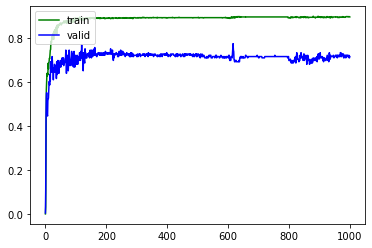

In [14]:
plt.plot(y[::2],[i.tolist() for i in x][::2], label="train", color ="Green")
plt.plot(y[::2],[i.tolist() for i in x][1::2], label="valid", color ="Blue")
plt.legend(loc='upper left')